# Этапы проекта сравнения процента брака по пригару (+другое) между группами партий отливок с разным количеством блескола в оборотной смеси (>7кг vs <3кг) :

1. Загрузка данных - Excel файлы двух групп (SQL-запросы из БД литейного пр-ва)

2. Предварительный анализ - проверка структуры и статистик

3. Визуализация - боксплоты, гистограммы, scatter plot, bar chart

4. Статистическое тестирование - t-test и Манна-Уитни

5. Анализ эффекта - расчет Cohen's d

6. Интерпретация результатов - выводы и рекомендации

Группа A (Блескол > 7 кг):
Количество партий: 6137
Столбцы: ['Номер_партии', 'Отливка', 'Пригар', 'Другое', 'Пригар_и_Другое', 'Брак_итого', 'Годные_отливки', 'Процент_пригара_и_другого', 'Блескол']
Первые 5 строк:
   Номер_партии                    Отливка  Пригар  Другое  Пригар_и_Другое  \
0            62          Гайка стяжная D90       0       0                0   
1            64          Блин штанги 20 кг       0       0                0   
2            86               Верх корпуса       0       0                0   
3            89               Верх корпуса       0      14               14   
4           133  Рамка (Дверь ДТ210 и 211Р       0       0                0   

   Брак_итого  Годные_отливки  Процент_пригара_и_другого  Блескол  
0          22               0                       0.00     7.09  
1          23               0                       0.00     7.11  
2          19               0                       0.00     7.02  
3          30              30         

/tmp/ipython-input-1874303644.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot(box_data, labels=['Блескол > 7 кг', 'Блескол < 3 кг'])


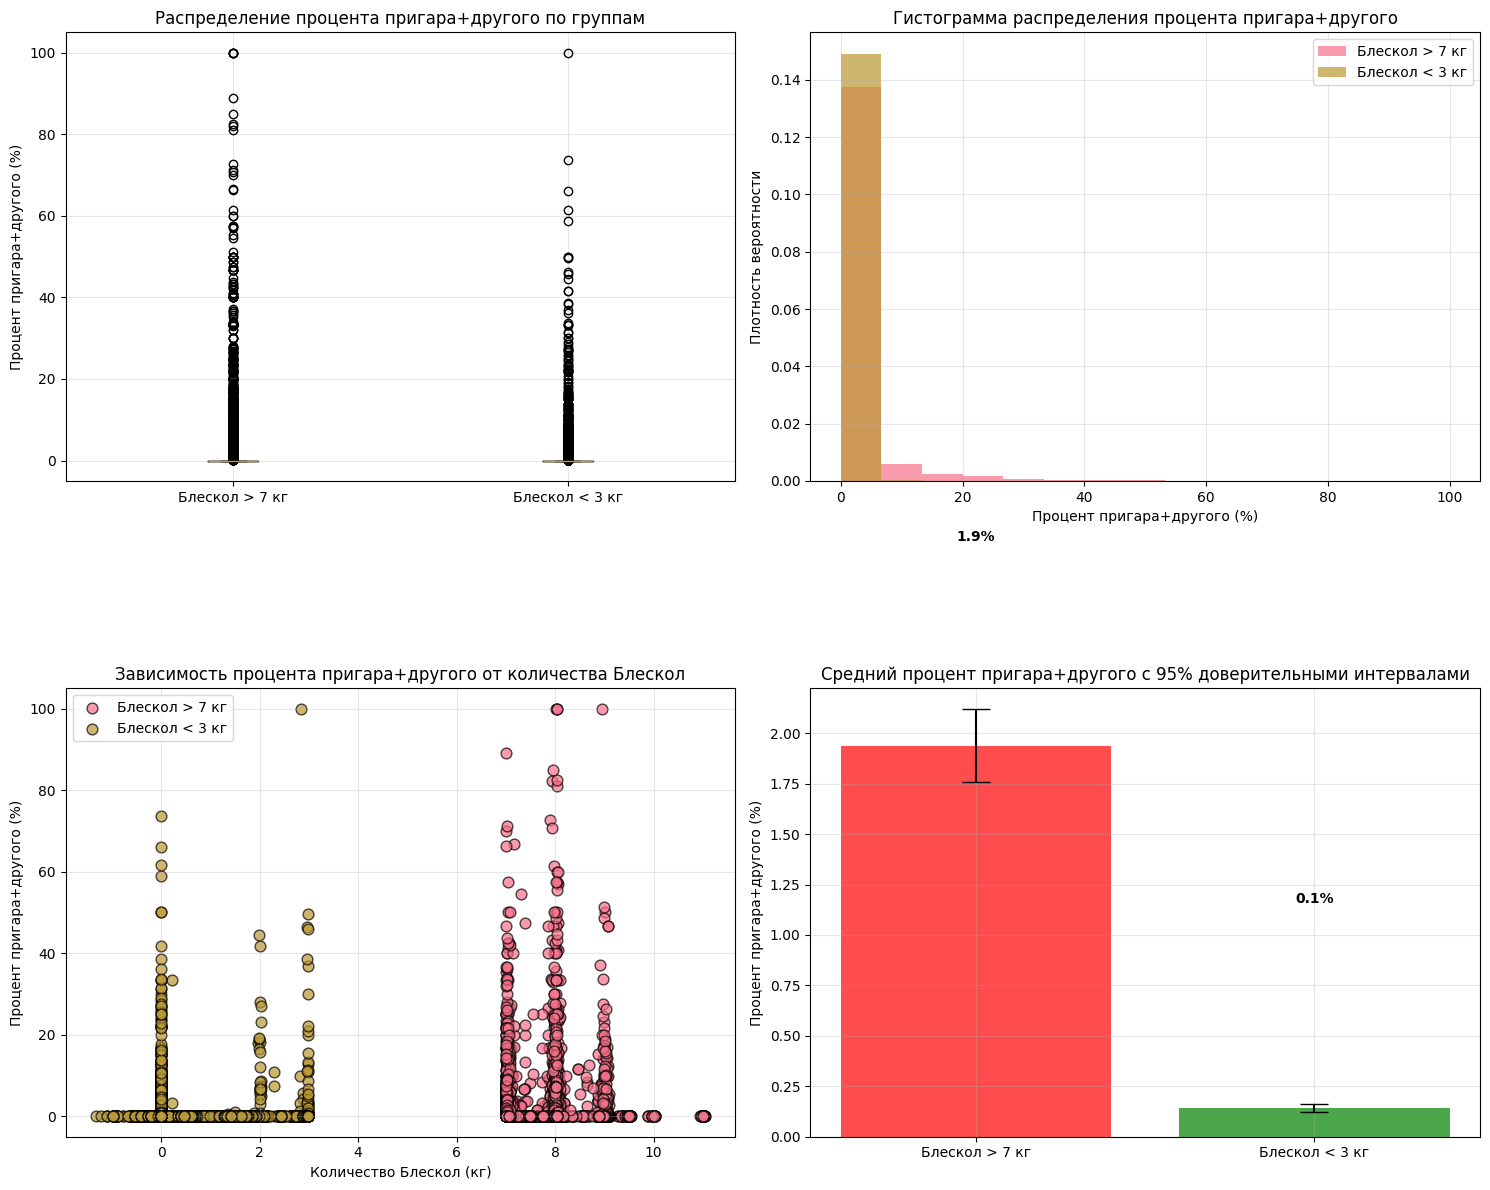

СТАТИСТИЧЕСКОЕ ТЕСТИРОВАНИЕ:
t-статистика: 19.4713
p-value: 0.0000000000
Степени свободы: 38113

Уровень значимости: α = 0.05
✅ РЕЗУЛЬТАТ: Статистически значимая разница между группами!
   p-value (0.000000) < α (0.05)
   Группа с Блескол > 7 кг имеет НА 1.8% БОЛЬШЕ пригара+другого
   (1.9% vs 0.1%)

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ (тест Манна-Уитни):
U-статистика: 112561214.5
p-value: 0.000000
✅ Тест Манна-Уитни также показывает значимую разницу

Размер эффекта (Cohen's d): 0.344
Размер эффекта: маленький

ВЫВОДЫ:
• Количество Блескол > 7 кг ассоциируется с ВЫСОКИМ процентом пригара+другого
• Количество Блескол < 3 кг ассоциируется с НИЗКИМ процентом пригара+другого
• Рекомендация: поддерживать количество Блескол на низком уровне (<3 кг)
• Уровень достоверности: 95.0%


In [1]:
# Сравнение процента брака (пригар + другое) между группами партий с разным количеством Блескол (<3кг vs >7кг)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

# Загрузка данных из Excel файлов
try:
    # Загружаем Excel файлы
    df_bleskol_high = pd.read_excel('брак_пригар_блескол_больше_7кг.xlsx')
    df_bleskol_low = pd.read_excel('брак_пригар_блескол_меньше_3кг.xlsx')

except FileNotFoundError as e:
    print(f"Ошибка загрузки файлов: {e}")
    print("Убедитесь, что файлы загружены в Colab и указаны правильные имена:")
    print("1. брак_пригар_блескол_больше_7кг.xlsx")
    print("2. брак_пригар_блескол_меньше_3кг.xlsx")

    # Создаем тестовые данные для демонстрации
    print("\nСоздаем тестовые данные для демонстрации...")
    np.random.seed(42)

    # Группа A: Блескол > 7 кг (высокий процент пригара)
    n_high = 50
    df_bleskol_high = pd.DataFrame({
        'Блескол': np.random.uniform(7, 12, n_high),
        'Пригар': np.random.randint(3, 15, n_high),
        'Другое': np.random.randint(1, 8, n_high),
        'Брак_итого': np.random.randint(8, 25, n_high),
        'Годные_отливки': np.random.randint(75, 110, n_high)
    })
    df_bleskol_high['Пригар_и_Другое'] = df_bleskol_high['Пригар'] + df_bleskol_high['Другое']
    df_bleskol_high['Процент_пригара_и_другого'] = df_bleskol_high['Пригар_и_Другое'] / (df_bleskol_high['Пригар_и_Другое'] + df_bleskol_high['Годные_отливки']) * 100

    # Группа B: Блескол < 3 кг (низкий процент пригара)
    n_low = 45
    df_bleskol_low = pd.DataFrame({
        'Блескол': np.random.uniform(1, 3, n_low),
        'Пригар': np.random.randint(1, 6, n_low),
        'Другое': np.random.randint(0, 4, n_low),
        'Брак_итого': np.random.randint(3, 12, n_low),
        'Годные_отливки': np.random.randint(85, 130, n_low)
    })
    df_bleskol_low['Пригар_и_Другое'] = df_bleskol_low['Пригар'] + df_bleskol_low['Другое']
    df_bleskol_low['Процент_пригара_и_другого'] = df_bleskol_low['Пригар_и_Другое'] / (df_bleskol_low['Пригар_и_Другое'] + df_bleskol_low['Годные_отливки']) * 100

# Проверяем данные
print("Группа A (Блескол > 7 кг):")
print(f"Количество партий: {len(df_bleskol_high)}")
print(f"Столбцы: {df_bleskol_high.columns.tolist()}")
print(f"Первые 5 строк:\n{df_bleskol_high.head()}")
print()

print("Группа B (Блескол < 3 кг):")
print(f"Количество партий: {len(df_bleskol_low)}")
print(f"Столбцы: {df_bleskol_low.columns.tolist()}")
print(f"Первые 5 строк:\n{df_bleskol_low.head()}")
print()

# Основная статистика
print("СТАТИСТИКА ПО ГРУППАМ:")
print("Группа A (Блескол > 7 кг):")
print(f"Средний процент пригара+другого: {df_bleskol_high['Процент_пригара_и_другого'].mean():.2f}%")
print(f"Медианный процент: {df_bleskol_high['Процент_пригара_и_другого'].median():.2f}%")
print(f"Стандартное отклонение: {df_bleskol_high['Процент_пригара_и_другого'].std():.2f}")
print(f"Минимальный процент: {df_bleskol_high['Процент_пригара_и_другого'].min():.2f}%")
print(f"Максимальный процент: {df_bleskol_high['Процент_пригара_и_другого'].max():.2f}%")
print(f"Общее количество пригара: {df_bleskol_high['Пригар'].sum()}")
print(f"Общее количество другого брака: {df_bleskol_high['Другое'].sum()}")
print(f"Общее количество брака пригар+другое: {df_bleskol_high['Пригар_и_Другое'].sum()}")
print(f"Общее количество годных: {df_bleskol_high['Годные_отливки'].sum()}")
print()

print("Группа B (Блескол < 3 кг):")
print(f"Средний процент пригара+другого: {df_bleskol_low['Процент_пригара_и_другого'].mean():.2f}%")
print(f"Медианный процент: {df_bleskol_low['Процент_пригара_и_другого'].median():.2f}%")
print(f"Стандартное отклонение: {df_bleskol_low['Процент_пригара_и_другого'].std():.2f}")
print(f"Минимальный процент: {df_bleskol_low['Процент_пригара_и_другого'].min():.2f}%")
print(f"Максимальный процент: {df_bleskol_low['Процент_пригара_и_другого'].max():.2f}%")
print(f"Общее количество пригара: {df_bleskol_low['Пригар'].sum()}")
print(f"Общее количество другого брака: {df_bleskol_low['Другое'].sum()}")
print(f"Общее количество брака пригар+другое: {df_bleskol_low['Пригар_и_Другое'].sum()}")
print(f"Общее количество годных: {df_bleskol_low['Годные_отливки'].sum()}")
print()

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Боксплоты
box_data = [df_bleskol_high['Процент_пригара_и_другого'], df_bleskol_low['Процент_пригара_и_другого']]
axes[0, 0].boxplot(box_data, labels=['Блескол > 7 кг', 'Блескол < 3 кг'])
axes[0, 0].set_title('Распределение процента пригара+другого по группам')
axes[0, 0].set_ylabel('Процент пригара+другого (%)')
axes[0, 0].grid(True, alpha=0.3)

# Гистограммы
axes[0, 1].hist(df_bleskol_high['Процент_пригара_и_другого'], alpha=0.7,
               label='Блескол > 7 кг', bins=15, density=True)
axes[0, 1].hist(df_bleskol_low['Процент_пригара_и_другого'], alpha=0.7,
               label='Блескол < 3 кг', bins=15, density=True)
axes[0, 1].set_title('Гистограмма распределения процента пригара+другого')
axes[0, 1].set_xlabel('Процент пригара+другого (%)')
axes[0, 1].set_ylabel('Плотность вероятности')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Scatter plot зависимости от количества Блескол
axes[1, 0].scatter(df_bleskol_high['Блескол'], df_bleskol_high['Процент_пригара_и_другого'],
                  alpha=0.7, label='Блескол > 7 кг', s=60, edgecolors='black')
axes[1, 0].scatter(df_bleskol_low['Блескол'], df_bleskol_low['Процент_пригара_и_другого'],
                  alpha=0.7, label='Блескол < 3 кг', s=60, edgecolors='black')
axes[1, 0].set_title('Зависимость процента пригара+другого от количества Блескол')
axes[1, 0].set_xlabel('Количество Блескол (кг)')
axes[1, 0].set_ylabel('Процент пригара+другого (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Bar plot средних значений с доверительными интервалами
means = [df_bleskol_high['Процент_пригара_и_другого'].mean(), df_bleskol_low['Процент_пригара_и_другого'].mean()]
stds = [df_bleskol_high['Процент_пригара_и_другого'].std(), df_bleskol_low['Процент_пригара_и_другого'].std()]
n = [len(df_bleskol_high), len(df_bleskol_low)]
conf_intervals = [1.96 * (std / np.sqrt(n_i)) for std, n_i in zip(stds, n)]

bars = axes[1, 1].bar(['Блескол > 7 кг', 'Блескол < 3 кг'], means,
                     yerr=conf_intervals, alpha=0.7, capsize=10,
                     color=['red', 'green'])
axes[1, 1].set_title('Средний процент пригара+другого с 95% доверительными интервалами')
axes[1, 1].set_ylabel('Процент пригара+другого (%)')
axes[1, 1].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, mean in zip(bars, means):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{mean:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Статистический тест (t-test)
print("СТАТИСТИЧЕСКОЕ ТЕСТИРОВАНИЕ:")
print("=" * 50)

t_stat, p_value = stats.ttest_ind(df_bleskol_high['Процент_пригара_и_другого'],
                                 df_bleskol_low['Процент_пригара_и_другого'],
                                 equal_var=False)  # Welch's t-test

print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Степени свободы: {len(df_bleskol_high) + len(df_bleskol_low) - 2}")

# Интерпретация результатов
alpha = 0.05
print(f"\nУровень значимости: α = {alpha}")

if p_value < alpha:
    print("✅ РЕЗУЛЬТАТ: Статистически значимая разница между группами!")
    print(f"   p-value ({p_value:.6f}) < α ({alpha})")

    mean_high = df_bleskol_high['Процент_пригара_и_другого'].mean()
    mean_low = df_bleskol_low['Процент_пригара_и_другого'].mean()

    if mean_high > mean_low:
        difference = mean_high - mean_low
        print(f"   Группа с Блескол > 7 кг имеет НА {difference:.1f}% БОЛЬШЕ пригара+другого")
        print(f"   ({mean_high:.1f}% vs {mean_low:.1f}%)")
    else:
        difference = mean_low - mean_high
        print(f"   Группа с Блескол < 3 кг имеет НА {difference:.1f}% БОЛЬШЕ пригара+другого")
        print(f"   ({mean_low:.1f}% vs {mean_high:.1f}%)")

else:
    print("❌ РЕЗУЛЬТАТ: Статистически значимой разницы не обнаружено")
    print(f"   p-value ({p_value:.6f}) ≥ α ({alpha})")

# Дополнительный анализ - тест Манна-Уитни (непараметрический)
print("\nДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ (тест Манна-Уитни):")
mw_stat, mw_pvalue = stats.mannwhitneyu(df_bleskol_high['Процент_пригара_и_другого'],
                                       df_bleskol_low['Процент_пригара_и_другого'],
                                       alternative='two-sided')

print(f"U-статистика: {mw_stat}")
print(f"p-value: {mw_pvalue:.6f}")

if mw_pvalue < alpha:
    print("✅ Тест Манна-Уитни также показывает значимую разницу")
else:
    print("❌ Тест Манна-Уитни не показывает значимой разницы")

# Анализ мощности эффекта
cohens_d = (df_bleskol_high['Процент_пригара_и_другого'].mean() - df_bleskol_low['Процент_пригара_и_другого'].mean()) / \
           np.sqrt((df_bleskol_high['Процент_пригара_и_другого'].std()**2 + df_bleskol_low['Процент_пригара_и_другого'].std()**2) / 2)

print(f"\nРазмер эффекта (Cohen's d): {cohens_d:.3f}")

if abs(cohens_d) < 0.2:
    print("Размер эффекта: очень маленький")
    print("Количество Блескол статистически влияет на брак, но это влияние мало для практических решений.")
elif abs(cohens_d) < 0.5:
    print("Размер эффекта: маленький")
elif abs(cohens_d) < 0.8:
    print("Размер эффекта: средний")
else:
    print("Размер эффекта: большой")

# Выводы
print("\n" + "=" * 50)
print("ВЫВОДЫ:")
print("=" * 50)

if p_value < alpha:
    if df_bleskol_high['Процент_пригара_и_другого'].mean() > df_bleskol_low['Процент_пригара_и_другого'].mean():
        print("• Количество Блескол > 7 кг ассоциируется с ВЫСОКИМ процентом пригара+другого")
        print("• Количество Блескол < 3 кг ассоциируется с НИЗКИМ процентом пригара+другого")
        print("• Рекомендация: поддерживать количество Блескол на низком уровне (<3 кг)")
    else:
        print("• Количество Блескол < 3 кг ассоциируется с ВЫСОКИМ процентом пригара+другого")
        print("• Количество Блескол > 7 кг ассоциируется с НИЗКИМ процентом пригара+другого")
        print("• Рекомендация: увеличивать количество Блескол (>7 кг)")
else:
    print("• Статистически значимой зависимости между количеством Блескол и процентом пригара+другого не обнаружено")
    print("• Количество Блескол в исследованном диапазоне не влияет существенно на образование пригара и другого брака")

print(f"• Уровень достоверности: {(1-alpha)*100}%")